In [ ]:
import sys
sys.path.append('..')

from scripts.data_loaders.common import show_sample
from scripts.data_loaders.L2ARCTIC import L2ArcticDataset, all_arctic_speaker_splits
from scripts.data_loaders.CORAAL import CORAALDataset
from scripts.data_loaders.Kokoro import KokoroDataset
from scripts.data_loaders.PSST import PSSTDataset
from scripts.data_loaders.TIMIT import TIMITDataset

from scripts.language_identification.speechbrain_encoder import identify_language_from_array

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
clear_output()

In [2]:
suitcase = L2ArcticDataset(split='suitcase_corpus', include_speaker_info=True)
arcticScripted = all_arctic_speaker_splits(include_speaker_info=True)
coraal = CORAALDataset(split='ATL', include_speaker_info=True)
kokoro = KokoroDataset(split='meian-by-soseki-natsume', include_speaker_info=True)
aphasia = PSSTDataset(split='test', include_speaker_info=True, force_offline=True)
timit = TIMITDataset(split='test', include_speaker_info=True)

psstdata INFO: Loaded data version local at /Users/alex/Desktop/CS/Startups/Koel/ML/notebooks/../scripts/data_loaders/../../.data/psst-data


IPA: jɛˈsʌˈmɪˈtsiˈmzɪffɹʌˈmðʌfɝˈsbɪˈktʃɝzzɪsɪzlaɪˈkʌbɪˈktʃɝoʊfʌˈmʌdaʊˈntaʊˈnɔfʌsiˈtiwɪˈzʌbɪˈkhɔtɛˈlsʌndtuˈtuˈbiˈpʌlwʌˈnwʊˈmʌnæˈndwʌˈnmæˈnwɛˈnduˈzɪˈshətɛˈlzʌnbɪkʌzzɛˈɹɪˈznoʊsɔɪnʌˈɔˈnzʌɔˈnzʌwɛˈndoʊzɪtʃwʌˈnlaɪˈkɹæˈʒdɪˈntuɪtʃʌˈðɝsʌndɑftɝðæˈtɑftɝkɹæˈʃʌˈðeɪˈfɑnðæˈtsɝbɹaɪˈzɪŋɡɹlizɛhæˈvdʌsɛmkɑˈlɝoʊvzʌbæˈkʌndɪhɪllaɪˈkɪˈtsɪssɪˈmʌlɝbæˈksæˈkʃʌliʌndɑftɹkɹæˈʃɪŋɡɪvɹiwʌˌndoʊˈkzɛiˈtʃʌˈdɹzbæˈkʌndɑftɝðæˈtwɛˈnwɛˈntbæˈktuˈðɛɹɹuˈmzðɛfaʊˈnðæˈtzʌˈmæˈndoʊˈkzʌˈdɹɛˈsɔvzʌˈɑftɝhɪˈzoʊbʌnɪŋtszʌˈzʌˈbæˈkhɪzbæˈkhiˈfʌnzʌthiˈtɔˈkʌˈhiˈfaʊˈndlaɪˈkʌɹɛˈddɹɛˈsɔfʌwʊˈmʌnʌnzʌwʊˈmʌnfɑnzʌtʌˈeɪˈjɪloʊtɔɪʌˈvðʌmæˈnʌndʌmnɑˈtʃʊˈɹwʌˈtswʌˈthæˈbʌnæˈftɝθæˈθ
Metadata: {'gender': 'M', 'native-language': 'Arabic'}


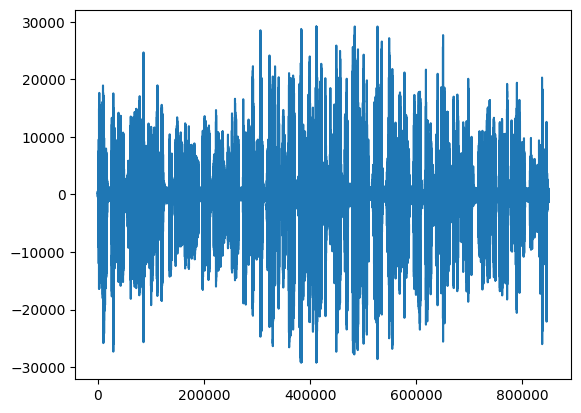

In [3]:
show_sample(suitcase[0])

IPA: fɔˈɹðʌˈtwɛˈntiɪθtaɪˈmðæˈtiˈvnɪŋkðʌˈtuˈmɛˈnʃʊˈkhæˈnss
Metadata: {'gender': 'M', 'native-language': 'Arabic'}


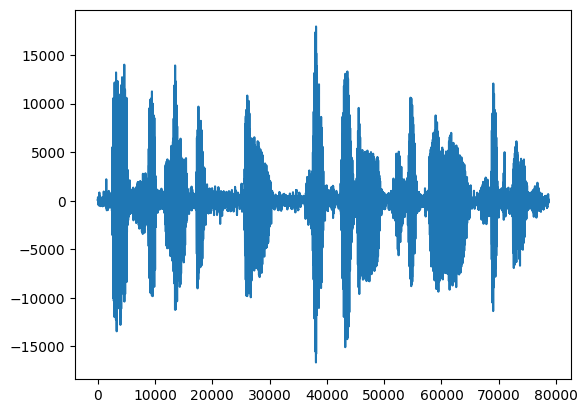

In [4]:
show_sample(arcticScripted[0])

In [ ]:
show_sample(coraal[0])

IPA: iɕaβasaɡɯɾʲioiɾetaatodeɕɨd͡ʑɨt͡sɨdainoɯekaɾaʔdaooɾoɕita
Metadata: {'reader': 'meian', 'author': 'soseki-natsume', 'transcription': '医者 は さ ぐり を 入れ た あと で 、 手術 台 の 上 からつ だ を おろし た 。', 'reading': 'i sh a _ w a _ s a _ g u r i _ o _ i r e _ t a _ a t o _ d e , sh u j u ts u _ d a i _ n o _ u e _ k a r a q _ d a _ o _ o r o sh i _ t a .'}


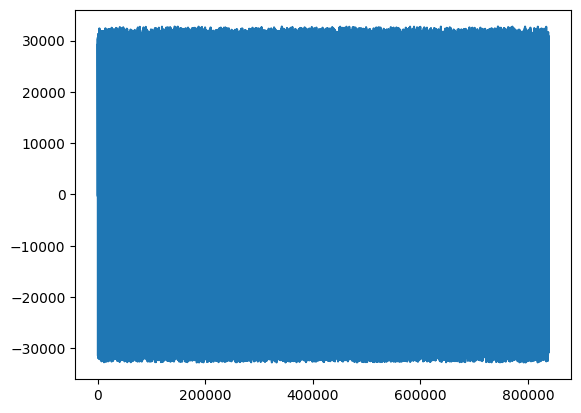

In [6]:
show_sample(kokoro[0])

IPA: eɪhaʊs
Metadata: {'utterance_id': 'ACWT01a-BNT01-house', 'test': 'BNT', 'session': 'ACWT01a', 'text_prompt': 'house', 'correct': True, 'aq_index': 63.9}


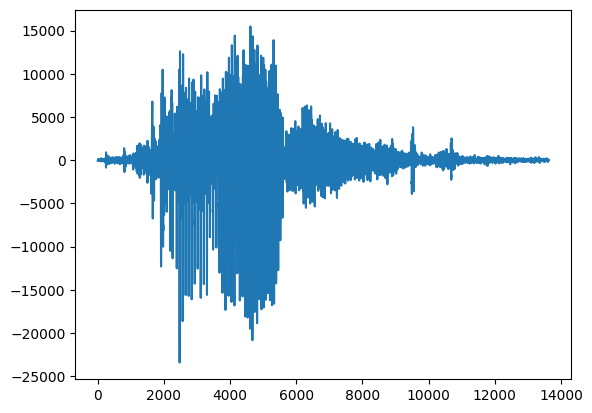

In [7]:
show_sample(aphasia[0])

IPA: stivwɔɹʌbɹaɪtɹɛdkæʃmɨɹswɛɾɚ
Metadata: {'SEX': 'M', 'DIALECT': 'Northern', 'SPLIT': 'TST', 'RECORDING_DATE': '04/11/86', 'BIRTH_DATE': '06/03/62', 'HEIGHT': '5\'10"', 'RACE': 'WHT', 'EDUCATION': 'BS'}


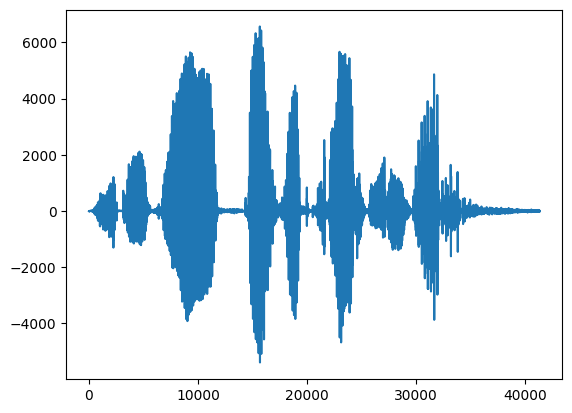

In [8]:
show_sample(timit[0])

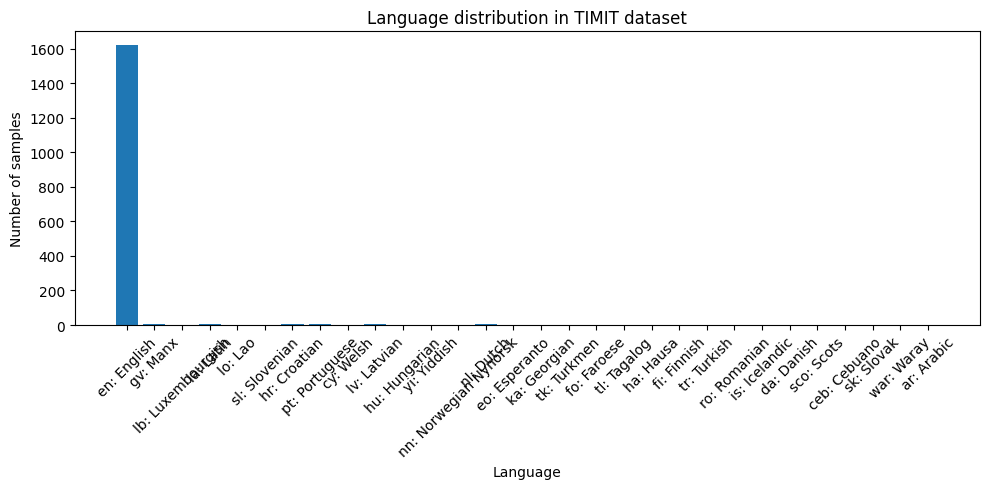

In [13]:
timit_langs = {}
for sample in timit:
    lang = identify_language_from_array(sample[1].copy()) # type: ignore
    timit_langs[lang] = timit_langs.get(lang, 0) + 1

# plot histogram
plt.figure(figsize=(10, 5))
plt.bar(timit_langs.keys(), timit_langs.values())
plt.xlabel('Language')
plt.ylabel('Number of samples')
plt.title('Language distribution in TIMIT dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
timit_accuracy = timit_langs['en: English'] / sum(timit_langs.values())
print(f"Accuracy of TIMIT language identification: {timit_accuracy:.2%}")

Accuracy of TIMIT language identification: 96.49%


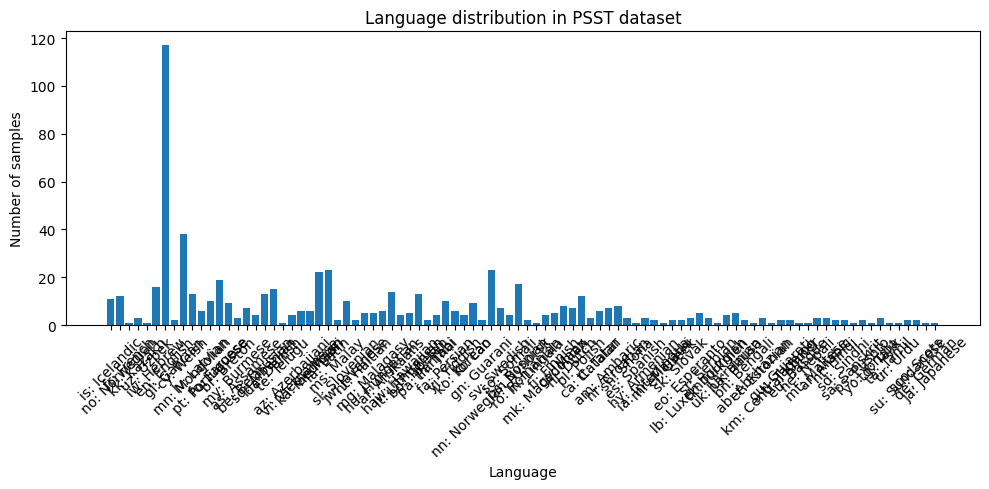

In [14]:
psst_langs = {}
for sample in aphasia:
    lang = identify_language_from_array(sample[1].copy()) # type: ignore
    psst_langs[lang] = psst_langs.get(lang, 0) + 1
    
# plot histogram
plt.figure(figsize=(10, 5))
plt.bar(psst_langs.keys(), psst_langs.values())
plt.xlabel('Language')
plt.ylabel('Number of samples')
plt.title('Language distribution in PSST dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
psst_accuracy = psst_langs['en: English'] / sum(psst_langs.values())
print(f"Accuracy of PSST language identification: {psst_accuracy:.2%}")

Accuracy of PSST language identification: 17.94%


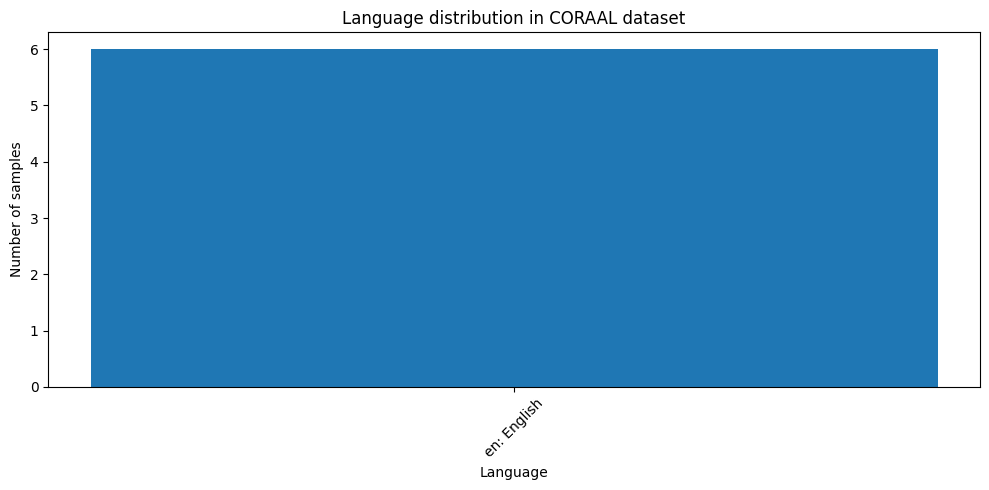

In [ ]:
coraal_langs = {}
for sample in coraal:
    lang = identify_language_from_array(sample[1].copy()) # type: ignore
    coraal_langs[lang] = coraal_langs.get(lang, 0) + 1
    
# plot histogram
plt.figure(figsize=(10, 5))
plt.bar(coraal_langs.keys(), coraal_langs.values())
plt.xlabel('Language')
plt.ylabel('Number of samples')
plt.title('Language distribution in CORAAL dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
coraal_accuracy = coraal_langs['en: English'] / sum(coraal_langs.values())
print(f"Accuracy of CORAAL language identification: {coraal_accuracy:.2%}")

Accuracy of CORAAL language identification: 100.00%


Accuracy of L2 Arctic language identification: 77.27%
Accuracy of L2 Arctic guessed native language identification: 13.64%


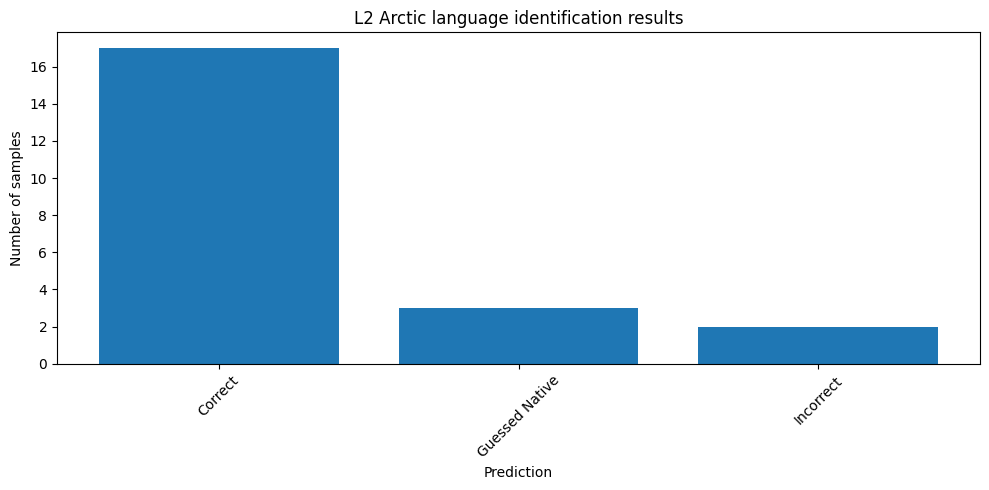

In [22]:
suitcase_records = []

for sample in suitcase:
    predicted_lang = identify_language_from_array(sample[1].copy()).split(': ')[1] # type: ignore
    spoken_lang = 'English'
    native_lang = sample[2]['native-language']
    suitcase_records.append({
        'predicted': predicted_lang,
        'spoken': spoken_lang,
        'native': native_lang
    })

suitcase_df = pd.DataFrame(suitcase_records)
suitcase_df['correct'] = suitcase_df['predicted'] == suitcase_df['spoken']  
suitcase_df['guessed_native'] = suitcase_df['predicted'] == suitcase_df['native']

suitcase_accuracy = suitcase_df['correct'].mean()
print(f"Accuracy of L2 Arctic language identification: {suitcase_accuracy:.2%}")
suitcase_guessed_native_accuracy = suitcase_df['guessed_native'].mean()
print(f"Accuracy of L2 Arctic guessed native language identification: {suitcase_guessed_native_accuracy:.2%}")

# plot histogram of correct, guessed_native and incorrect
num_correct = suitcase_df['correct'].sum()
num_guessed_native = suitcase_df['guessed_native'].sum()
num_incorrect = len(suitcase_df) - num_correct - num_guessed_native
plt.figure(figsize=(10, 5))
plt.bar(['Correct', 'Guessed Native', 'Incorrect'], [num_correct, num_guessed_native, num_incorrect])
plt.xlabel('Prediction')
plt.ylabel('Number of samples')
plt.title('L2 Arctic language identification results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Accuracy of Arctic Scripted language identification: 49.96%
Accuracy of Arctic Scripted guessed native language identification: 9.31%


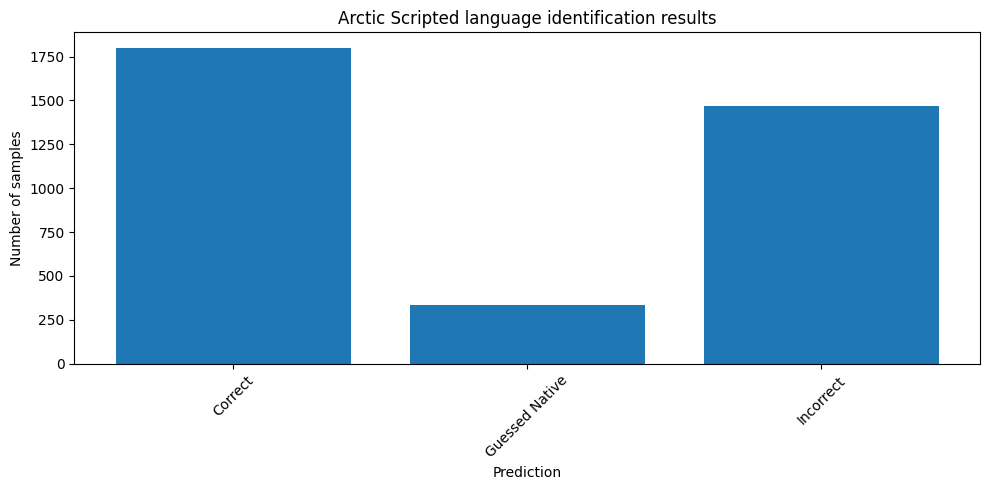

In [23]:
arcticScripted_records = []

for sample in arcticScripted:
    predicted_lang = identify_language_from_array(sample[1].copy()).split(': ')[1] # type: ignore
    spoken_lang = 'English'
    native_lang = sample[2]['native-language']
    arcticScripted_records.append({
        'predicted': predicted_lang,
        'spoken': spoken_lang,
        'native': native_lang
    })

arcticScripted_df = pd.DataFrame(arcticScripted_records)
arcticScripted_df['correct'] = arcticScripted_df['predicted'] == arcticScripted_df['spoken']
arcticScripted_df['guessed_native'] = arcticScripted_df['predicted'] == arcticScripted_df['native']

arcticScripted_accuracy = arcticScripted_df['correct'].mean()
print(f"Accuracy of Arctic Scripted language identification: {arcticScripted_accuracy:.2%}")
arcticScripted_guessed_native_accuracy = arcticScripted_df['guessed_native'].mean()
print(f"Accuracy of Arctic Scripted guessed native language identification: {arcticScripted_guessed_native_accuracy:.2%}")

# plot histogram of correct, guessed_native and incorrect
num_correct = arcticScripted_df['correct'].sum()
num_guessed_native = arcticScripted_df['guessed_native'].sum()
num_incorrect = len(arcticScripted_df) - num_correct - num_guessed_native
plt.figure(figsize=(10, 5))
plt.bar(['Correct', 'Guessed Native', 'Incorrect'], [num_correct, num_guessed_native, num_incorrect])
plt.xlabel('Prediction')
plt.ylabel('Number of samples')
plt.title('Arctic Scripted language identification results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

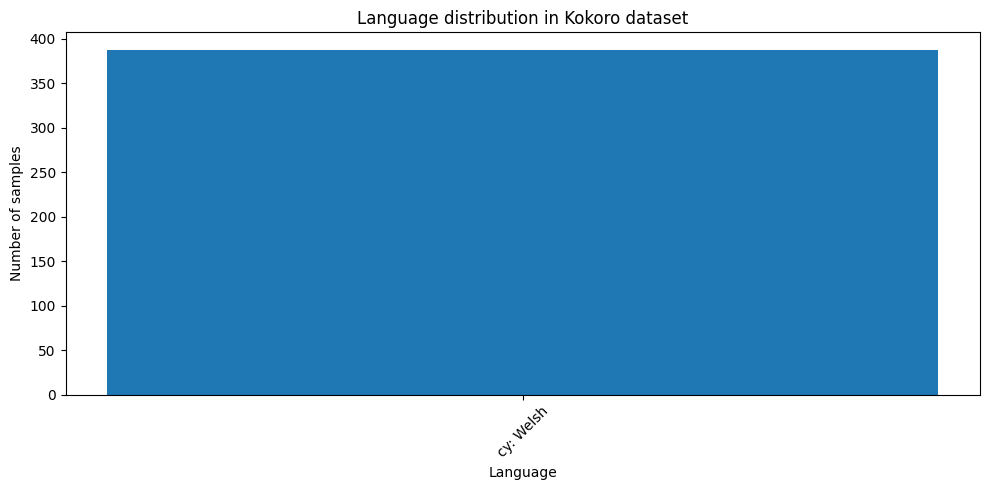

In [ ]:
kokoro_langs = {}
for sample in kokoro:
    lang = identify_language_from_array(sample[1].copy()) # type: ignore
    kokoro_langs[lang] = kokoro_langs.get(lang, 0) + 1

# plot histogram
plt.figure(figsize=(10, 5))
plt.bar(kokoro_langs.keys(), kokoro_langs.values())
plt.xlabel('Language')
plt.ylabel('Number of samples')
plt.title('Language distribution in Kokoro dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
kokoro_accuracy = kokoro_langs.get('ja: Japanese', 0) / sum(kokoro_langs.values())
print(f"Accuracy of Kokoro language identification: {kokoro_accuracy:.2%}")

Accuracy of Kokoro language identification: 0.00%


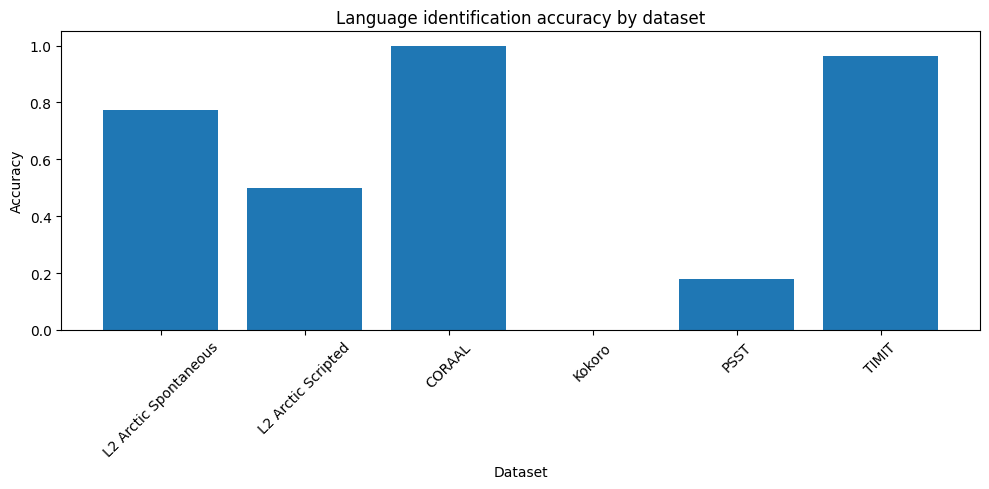

In [30]:
# overall bar chart of accuracy by dataset
plt.figure(figsize=(10, 5))
plt.bar(['L2 Arctic Spontaneous', 'L2 Arctic Scripted', 'CORAAL', 'Kokoro', 'PSST', 'TIMIT'], 
        [suitcase_accuracy, arcticScripted_accuracy, coraal_accuracy, kokoro_accuracy, psst_accuracy, timit_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Language identification accuracy by dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()